# Explore Exercises

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [1]:
import pandas as pd
import requests
from imports import *

## Acquire

In [2]:
df = acquire.get_whole_sales()

In [3]:
df.shape

(913000, 15)

## Prepare

In [4]:
df = prepare.prep_sales(df)

In [5]:
df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Jan,Tuesday,10.92
2013-01-01,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,Jan,Tuesday,218.40
2013-01-01,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,Jan,Tuesday,125.55
2013-01-01,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,Jan,Tuesday,453.60
2013-01-01,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,Jan,Tuesday,294.00


## Data Splitting

- Ideally all splits contain a season
- Human-based: Using domain knowledge, a cutoff is selected. (ex: use the last year as Test)
- Percentage-based: A cutoff is selected arbitrarily (ex: use the last 20% of observations as Test)
- Cross-validation-based: Break data into slices and use successive slices as train and test repeatedly

`sklearn.model_selection.TimeSeriesSplit`

### Human-Based

In [11]:
# Checking the date range
df.index.min()

Timestamp('2013-01-01 00:00:00')

In [12]:
df.index.max()

Timestamp('2017-12-31 00:00:00')

In [7]:
# Splitting train from 2013-2016, 2017 for test
train = df[:'2016']
test = df['2017']

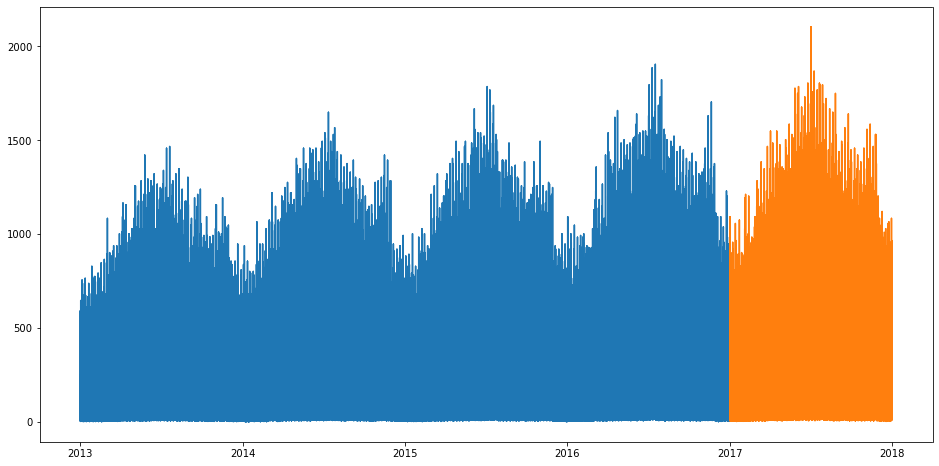

In [16]:
# Visualizing train, test set
plt.figure(figsize = (16,8))
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

## Explore

In [18]:
y = train.sales_total
y.head()

sale_date
2013-01-01     10.92
2013-01-01    218.40
2013-01-01    125.55
2013-01-01    453.60
2013-01-01    294.00
Name: sales_total, dtype: float64

### Basic Histogram (Ignoring Time Component)

<AxesSubplot:title={'center':'Distribution of Sales Total'}, xlabel='Sales Amount in USD', ylabel='Frequency'>

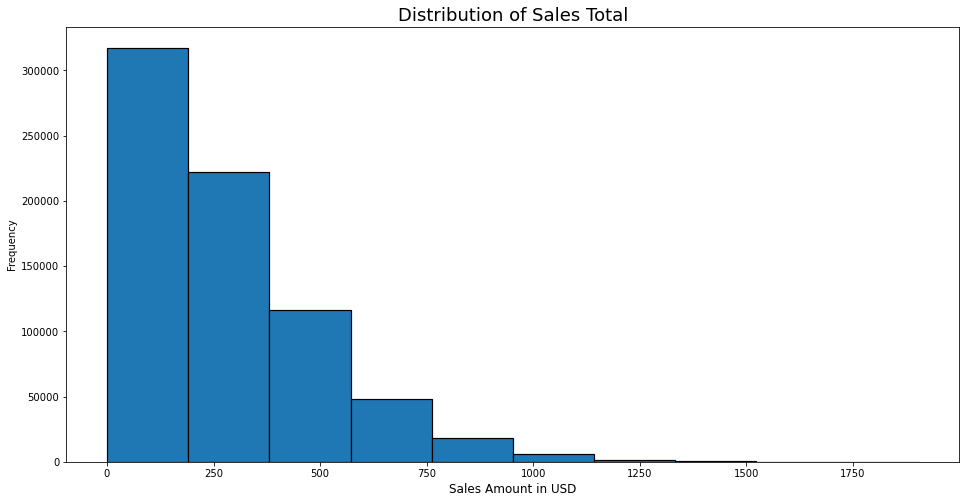

In [24]:
plt.figure(figsize=(16,8))
plt.title('Distribution of Sales Total', fontsize = 18)
plt.xlabel('Sales Amount in USD', fontsize = 12)
y.plot.hist(linewidth=1.2, edgecolor='black')

## Adding Time Component

In [21]:
train.groupby('month').sales_total.mean()

month
Apr    286.463913
Aug    308.319972
Dec    204.265461
Feb    205.001723
Jan    185.232810
Jul    348.595409
Jun    328.098415
Mar    246.694359
May    308.932679
Nov    287.761324
Oct    266.773078
Sep    286.252615
Name: sales_total, dtype: float64

<AxesSubplot:title={'center':'Sales Total by Month'}, xlabel='month', ylabel='sales_total'>

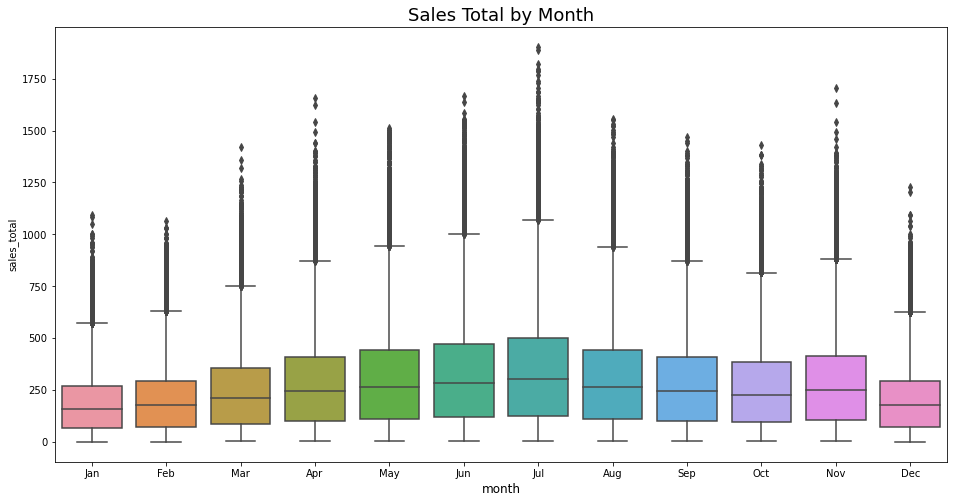

In [26]:
# Boxplot for each month
plt.figure(figsize = (16,8))
plt.title('Sales Total by Month', fontsize = 18)
plt.xlabel('Month', fontsize = 12)
sns.boxplot(data = train, x = 'month', y = 'sales_total')

<AxesSubplot:title={'center':'Sales Total by Day of Week'}, xlabel='day_of_week', ylabel='sales_total'>

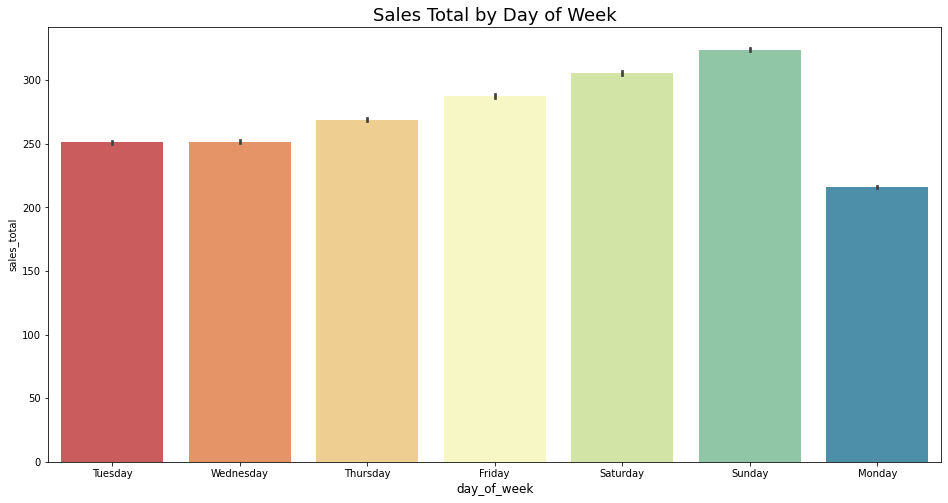

In [10]:
# Boxplot for each day of week
plt.figure(figsize = (16,8))
plt.title('Sales Total by Day of Week', fontsize = 18)
plt.xlabel('Month', fontsize = 12)
sns.barplot(data=train, x='day_of_week', y='sales_total',palette = 'Spectral')

### Visualizing Target Over Time